In [43]:
# Phoebe Waters DVAMI19h

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

import ipykernel
ipykernel.__version__

'6.16.2'

In [44]:
#fixing dataset
df = pd.read_csv("spambase.csv")

df = df.drop_duplicates()
df = df.reset_index()


In [45]:
# another way to descretecize, binning
est = KBinsDiscretizer(n_bins= 10, encode='ordinal', strategy='uniform')
est.fit(df)

df_matrix = est.transform(df)

print(df_matrix)

[[0. 0. 0. ... 0. 0. 9.]
 [0. 0. 0. ... 0. 0. 9.]
 [0. 0. 0. ... 0. 1. 9.]
 ...
 [9. 0. 0. ... 0. 0. 0.]
 [9. 2. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]]


In [46]:
#split data into training and testing
#training data only contains positive values
limit = 1500
training_matrix = df_matrix[:limit]
testing_matrix = df_matrix[limit:]
testing_real_values = df.iloc[limit:, -1]
testing_real_values = testing_real_values.tolist()
training_matrix = np.delete(training_matrix,-1,1)
testing_matrix = np.delete(testing_matrix,-1,1)


(array([   0.,    0.,    0.,    0.,    0., 1500.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

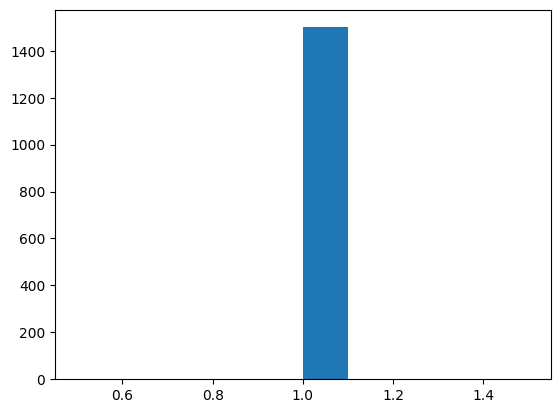

In [47]:
#checking that all training_matrix datapoints are positive
plt.hist(df.iloc[:limit, -1])

In [48]:
# algorithm 4.2 LGG conj

def LGG_conj(instance, main_list):
    
    for i in range(len(instance)):
        if instance[i] not in main_list[i]:
            main_list[i].append(instance[i])
    
    return main_list

In [49]:
main_list = []
for values in training_matrix[0]:
    main_list.append([values])
    
counter = 1
while counter != len(training_matrix):
    main_list = LGG_conj(training_matrix[counter], main_list)
    counter +=1
print(main_list)

[[0.0, 1.0, 2.0, 3.0], [0.0, 2.0, 1.0, 4.0, 3.0, 5.0], [0.0, 1.0, 2.0, 3.0], [1.0, 0.0, 2.0, 5.0, 3.0, 4.0, 7.0, 6.0], [0.0, 1.0, 3.0, 9.0, 2.0, 4.0, 8.0], [0.0, 1.0, 2.0, 4.0, 6.0, 7.0, 3.0, 5.0], [0.0, 1.0, 2.0, 3.0, 4.0], [0.0, 1.0, 2.0, 3.0, 4.0, 7.0, 5.0, 9.0, 6.0], [0.0, 1.0, 2.0, 4.0, 3.0, 5.0], [0.0, 1.0, 2.0, 3.0, 6.0, 4.0], [0.0, 1.0, 2.0, 4.0], [0.0, 1.0, 3.0, 2.0, 5.0, 4.0, 7.0, 9.0, 6.0], [0.0, 1.0, 2.0, 3.0, 6.0, 4.0, 5.0], [0.0, 1.0, 2.0, 3.0, 9.0, 4.0], [0.0, 1.0, 4.0, 3.0, 2.0], [0.0, 3.0, 2.0, 5.0, 1.0, 4.0], [0.0, 2.0, 1.0, 5.0, 3.0], [0.0, 1.0, 2.0, 7.0, 3.0, 4.0, 5.0, 9.0, 6.0], [1.0, 0.0, 3.0, 5.0, 4.0, 2.0, 7.0], [1.0, 0.0, 2.0, 3.0, 6.0, 4.0], [0.0, 1.0, 2.0, 9.0, 3.0], [0.0, 1.0, 2.0, 3.0, 4.0, 5.0], [0.0, 5.0, 3.0, 1.0, 4.0, 2.0, 9.0, 6.0, 7.0], [0.0, 2.0, 1.0, 3.0, 4.0, 6.0, 5.0, 9.0, 8.0], [0.0, 2.0, 1.0, 9.0, 3.0, 5.0, 4.0], [0.0, 1.0], [0.0, 1.0], [0.0], [0.0, 9.0], [0.0], [0.0, 1.0, 3.0, 5.0], [0.0, 1.0], [0.0], [0.0, 1.0], [0.0, 2.0], [0.0], [0.0, 1.0, 2

In [50]:
#testing, compare main_list with testing_matrix, 0 = spam, 4 = not spam
TP = 0
FP = 0
TN = 0
FN = 0
result = []

def compare(instance, main_list):
    for i in range(len(instance)):
        if instance[i] not in main_list[i]:
            result.append(0)
            return
    result.append(1)

for instance in testing_matrix:
    compare(instance, main_list)

for i in range(len(result)):
    if result[i] == testing_real_values[i] and result[i] == 1:
        TP += 1
    elif result[i] == testing_real_values[i] and result[i] == 0: 
        TN += 1
    elif result[i] != testing_real_values[i] and result[i] == 1:
        FP += 1
    else:
        FN += 1
print(TP, TN, FP, FN)
print((TP + TN)/(TP+TN+FP+FN)*100,"%","accuracy")
res = ([[TP, FP],
[TN, FN]])


166 2520 11 13
99.11439114391143 % accuracy


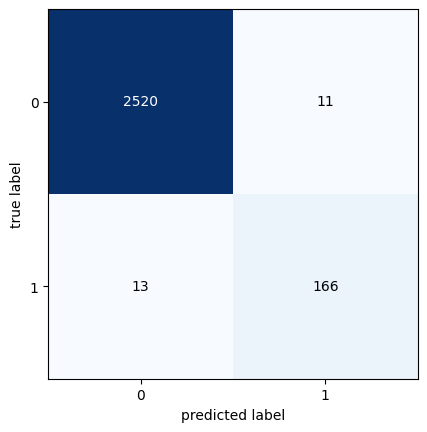

In [51]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_target=testing_real_values, 
                      y_predicted=result, 
                      binary=True, 
                      positive_label=1)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()